# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



In [1]:
import pandas as pd

df = pd.read_csv('Employee_productivity.csv')

df.head()

,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote


Loading dataset...
Dataset loaded with 300 rows and 7 columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float64
 1   FocusScore           300 non-null    float64
 2   ProductivityScore    300 non-null    float64
 3   Department           300 non-null    object 
 4   YearsAtCompany       300 non-null    int64  
 5   TeamMeetingsPerWeek  300 non-null    int64  
 6   DeskLocation         300 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ KB
None

First 5 rows:
   HoursWorked  FocusScore  ProductivityScore   Department  YearsAtCompany  \
0         42.4         6.3            3127.96  Engineering              17   
1         34.0         7.2            4742.60           HR               8   
2         47.2         5.6            2044.73   

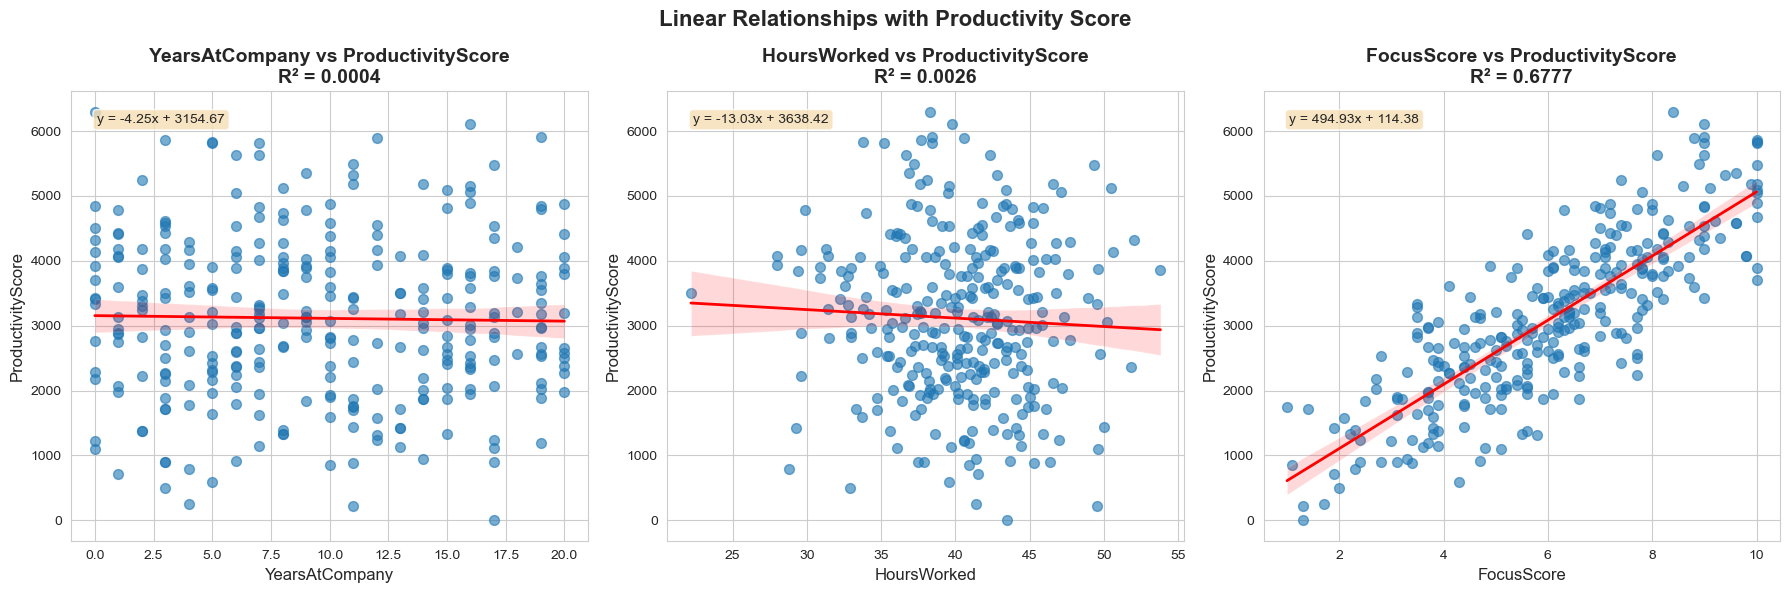


R-squared values for each feature:
YearsAtCompany: R² = 0.0004
HoursWorked: R² = 0.0026
FocusScore: R² = 0.6777

The feature with the strongest linear relationship is 'FocusScore' with R² = 0.6777


In [3]:
#SOLUTION TO QUESTION 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('Employee_productivity.csv')
print(f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns\n")

# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Separate features for analysis
features = ['YearsAtCompany', 'HoursWorked', 'FocusScore', 'ProductivityScore']
print(f"\nFeatures to analyze: {features}")

# Question 1: Find strongest linear relationship with ProductivityScore
print("\n" + "="*80)
print("QUESTION 1: Which feature has the strongest linear relationship with ProductivityScore?")
print("="*80)

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Linear Relationships with Productivity Score', fontsize=16, fontweight='bold')

r2_scores = {}
features_to_test = ['YearsAtCompany', 'HoursWorked', 'FocusScore']

for idx, feature in enumerate(features_to_test):
    # Calculate linear regression
    X = df[[feature]]
    y = df['ProductivityScore']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate predictions and R-squared
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    r2_scores[feature] = r2
    
    # Create scatter plot with regression line
    ax = axes[idx]
    sns.regplot(x=feature, y='ProductivityScore', data=df, ax=ax, 
                scatter_kws={'alpha': 0.6, 's': 50}, 
                line_kws={'color': 'red', 'linewidth': 2})
    
    # Add statistics to plot
    ax.set_title(f'{feature} vs ProductivityScore\nR² = {r2:.4f}', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('ProductivityScore', fontsize=12)
    
    # Add regression equation
    slope = model.coef_[0]
    intercept = model.intercept_
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    ax.text(0.05, 0.95, equation, transform=ax.transAxes, 
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Determine which feature has the strongest relationship
strongest_feature = max(r2_scores, key=r2_scores.get)
print("\nR-squared values for each feature:")
for feature, score in r2_scores.items():
    print(f"{feature}: R² = {score:.4f}")

print(f"\nThe feature with the strongest linear relationship is '{strongest_feature}' " 
      f"with R² = {r2_scores[strongest_feature]:.4f}")


QUESTION 2: Build comprehensive productivity prediction model

Encoding categorical variables...
Features after preprocessing: ['HoursWorked', 'FocusScore', 'YearsAtCompany', 'TeamMeetingsPerWeek', 'Dept_Engineering', 'Dept_HR', 'Dept_Marketing', 'Dept_Sales', 'DeskLocation_encoded']
Training set: 240 samples
Test set: 60 samples

Building linear regression model...
Training R²: 0.6954
Testing R²: 0.6032

Feature coefficients (sorted by impact magnitude):
                Feature  Coefficient  Abs_Coefficient
1            FocusScore   495.029707       495.029707
6        Dept_Marketing  -149.340315       149.340315
4      Dept_Engineering   103.712140       103.712140
8  DeskLocation_encoded    60.000459        60.000459
5               Dept_HR    53.901898        53.901898
3   TeamMeetingsPerWeek    34.323135        34.323135
7            Dept_Sales    -8.273723         8.273723
0           HoursWorked    -6.416913         6.416913
2        YearsAtCompany     5.460001         5.460001

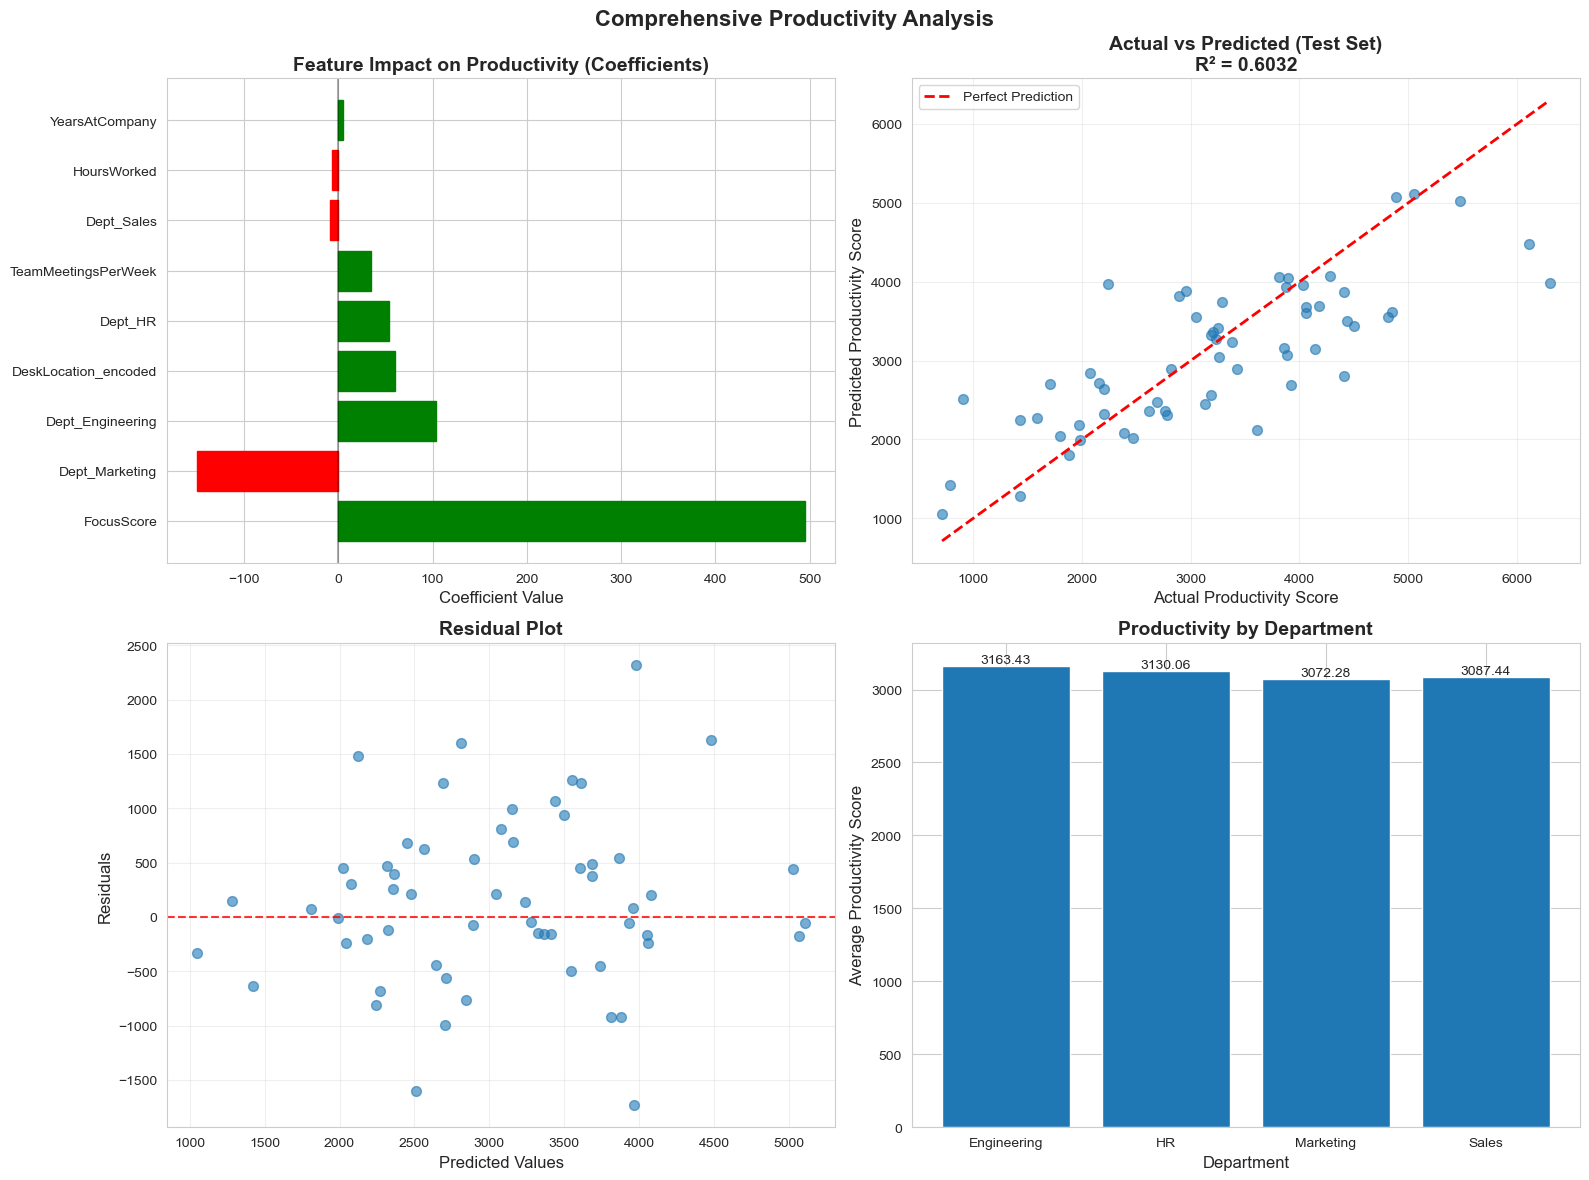


----------------------------------------
Desk Location Analysis:
----------------------------------------
                       mean          std  count
DeskLocation                                   
Open Plan       2863.193689  1259.229925    103
Private Office  3226.829813  1369.512514    107
Remote          3267.437556  1036.745151     90


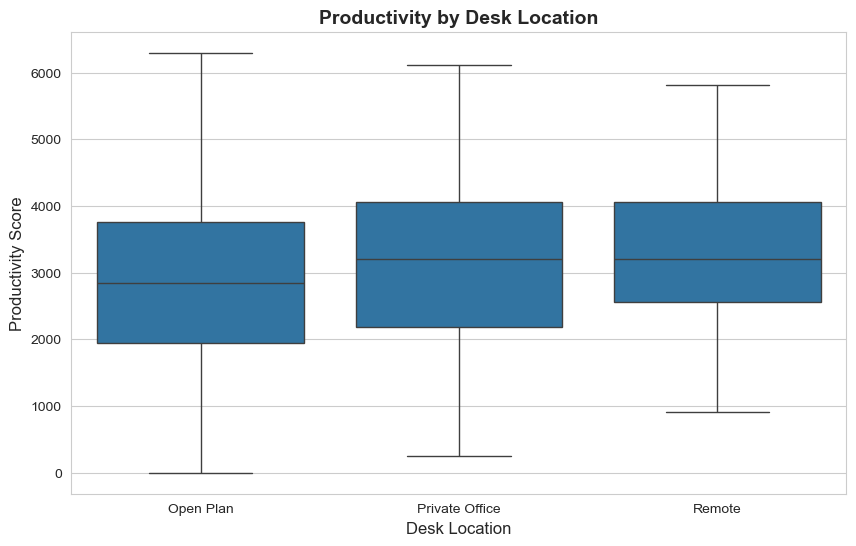


----------------------------------------
Team Meetings Analysis:
----------------------------------------


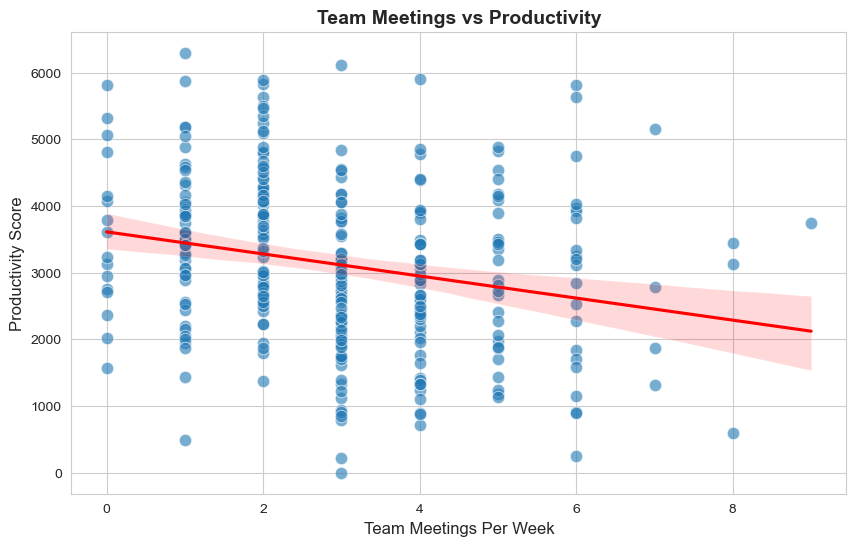

Correlation between TeamMeetingsPerWeek and ProductivityScore: -0.2329


In [5]:
#SOLUTION TO QUESTION 2

# Question 2: Build comprehensive model
print("\n" + "="*80)
print("QUESTION 2: Build comprehensive productivity prediction model")
print("="*80)

# Prepare data for modeling
df_model = df.copy()

# Encode categorical variables
print("\nEncoding categorical variables...")
label_encoders = {}

# One-hot encode Department
df_model = pd.get_dummies(df_model, columns=['Department'], prefix='Dept')

# Encode DeskLocation as ordinal (assuming Remote=0, Open Plan=1, Private Office=2)
desk_mapping = {'Remote': 0, 'Open Plan': 1, 'Private Office': 2}
df_model['DeskLocation_encoded'] = df_model['DeskLocation'].map(desk_mapping)

# Drop the original DeskLocation column
df_model = df_model.drop('DeskLocation', axis=1)

# Define features and target
X = df_model.drop('ProductivityScore', axis=1)
y = df_model['ProductivityScore']

print(f"Features after preprocessing: {list(X.columns)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Build linear regression model
print("\nBuilding linear regression model...")
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R-squared scores
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# Create coefficient analysis
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nFeature coefficients (sorted by impact magnitude):")
print(coefficients)

# Visualize feature importance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Productivity Analysis', fontsize=16, fontweight='bold')

# 1. Feature coefficients
ax1 = axes[0, 0]
bars = ax1.barh(coefficients['Feature'], coefficients['Coefficient'])
ax1.set_xlabel('Coefficient Value', fontsize=12)
ax1.set_title('Feature Impact on Productivity (Coefficients)', fontsize=14, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Color bars based on positive/negative impact
for bar, coef in zip(bars, coefficients['Coefficient']):
    if coef >= 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

# 2. Actual vs Predicted
ax2 = axes[0, 1]
ax2.scatter(y_test, y_pred_test, alpha=0.6, s=50)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Productivity Score', fontsize=12)
ax2.set_ylabel('Predicted Productivity Score', fontsize=12)
ax2.set_title(f'Actual vs Predicted (Test Set)\nR² = {test_r2:.4f}', 
              fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Residuals analysis
ax3 = axes[1, 0]
residuals = y_test - y_pred_test
ax3.scatter(y_pred_test, residuals, alpha=0.6, s=50)
ax3.axhline(y=0, color='r', linestyle='--', alpha=0.8)
ax3.set_xlabel('Predicted Values', fontsize=12)
ax3.set_ylabel('Residuals', fontsize=12)
ax3.set_title('Residual Plot', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Department analysis
ax4 = axes[1, 1]
dept_columns = [col for col in df_model.columns if col.startswith('Dept_')]
dept_means = []
dept_labels = []

for dept_col in dept_columns:
    dept_name = dept_col.replace('Dept_', '')
    dept_means.append(df_model[df_model[dept_col] == 1]['ProductivityScore'].mean())
    dept_labels.append(dept_name)

bars_dept = ax4.bar(dept_labels, dept_means)
ax4.set_xlabel('Department', fontsize=12)
ax4.set_ylabel('Average Productivity Score', fontsize=12)
ax4.set_title('Productivity by Department', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar in bars_dept:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Additional analysis: DeskLocation impact
print("\n" + "-"*40)
print("Desk Location Analysis:")
print("-"*40)
desk_analysis = df.groupby('DeskLocation')['ProductivityScore'].agg(['mean', 'std', 'count'])
print(desk_analysis)

# Visualize desk location impact
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='DeskLocation', y='ProductivityScore', data=df, ax=ax)
ax.set_title('Productivity by Desk Location', fontsize=14, fontweight='bold')
ax.set_xlabel('Desk Location', fontsize=12)
ax.set_ylabel('Productivity Score', fontsize=12)
plt.show()

# Team meetings analysis
print("\n" + "-"*40)
print("Team Meetings Analysis:")
print("-"*40)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='TeamMeetingsPerWeek', y='ProductivityScore', data=df, 
                alpha=0.6, s=80, ax=ax)
# Add regression line
sns.regplot(x='TeamMeetingsPerWeek', y='ProductivityScore', data=df, 
            scatter=False, ax=ax, color='red')
ax.set_title('Team Meetings vs Productivity', fontsize=14, fontweight='bold')
ax.set_xlabel('Team Meetings Per Week', fontsize=12)
ax.set_ylabel('Productivity Score', fontsize=12)
plt.show()

# Calculate correlation for team meetings
meetings_corr = df['TeamMeetingsPerWeek'].corr(df['ProductivityScore'])
print(f"Correlation between TeamMeetingsPerWeek and ProductivityScore: {meetings_corr:.4f}")


In [7]:
#SOLUTION TO QUESTION 3

# Question 3: Summary and recommendations
print("\n" + "="*80)
print("QUESTION 3: Summary and Recommendations")
print("="*80)

print("\nSUMMARY OF FINDINGS:")
print("-" * 50)
print(f"1. Strongest individual predictor: '{strongest_feature}' (R² = {r2_scores[strongest_feature]:.4f})")
print(f"2. Comprehensive model performance: R² = {test_r2:.4f} on test data")
print("\n3. Key factors influencing productivity (in order of impact magnitude):")
for idx, row in coefficients.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   - {row['Feature']}: {direction} productivity (impact: {row['Coefficient']:.4f})")


QUESTION 3: Summary and Recommendations

SUMMARY OF FINDINGS:
--------------------------------------------------
1. Strongest individual predictor: 'FocusScore' (R² = 0.6777)
2. Comprehensive model performance: R² = 0.6032 on test data

3. Key factors influencing productivity (in order of impact magnitude):
   - FocusScore: increases productivity (impact: 495.0297)
   - Dept_Marketing: decreases productivity (impact: -149.3403)
   - Dept_Engineering: increases productivity (impact: 103.7121)
   - DeskLocation_encoded: increases productivity (impact: 60.0005)
   - Dept_HR: increases productivity (impact: 53.9019)
   - TeamMeetingsPerWeek: increases productivity (impact: 34.3231)
   - Dept_Sales: decreases productivity (impact: -8.2737)
   - HoursWorked: decreases productivity (impact: -6.4169)
   - YearsAtCompany: increases productivity (impact: 5.4600)


Question 3 answer: 
The 3 factors (features) that most influenced productivity are focus score, department, and desk location. Years at the company had the least impact.